In [9]:
# pip install osmnx

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.4 requires pathlib, which is not installed.
anaconda-project 0.10.1 requires ruamel-yaml, which is not installed.


  Attempting uninstall: requests
    Found existing installation: requests 2.26.0
    Uninstalling requests-2.26.0:
      Successfully uninstalled requests-2.26.0


In [2]:
# Import necessary libraries

import geopandas as gpd

In [3]:
# Thay đổi đường dẫn của tệp CSV thành đường dẫn thực tế của bạn
file_path = 'D:/Study/Ma_Nguon_mo/bai_cuoi_ki/df_filtered_column.csv'

# Đọc tệp CSV vào DataFrame
df = pd.read_csv(file_path)

# Hiển thị dữ liệu trong DataFrame
df.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,GarageType,GarageYrBlt,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,SalePrice
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Attchd,2003,RFn,548,TA,TA,Y,WD,Normal,208500
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,Attchd,1976,RFn,460,TA,TA,Y,WD,Normal,181500
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Attchd,2001,RFn,608,TA,TA,Y,WD,Normal,223500
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Detchd,1998,Unf,642,TA,TA,Y,WD,Abnorml,140000
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Attchd,2000,RFn,836,TA,TA,Y,WD,Normal,250000


In [4]:
# Thay đổi đường dẫn của tệp CSV thành đường dẫn thực tế của bạn
file_path = 'D:/Study/Ma_Nguon_mo/bai_cuoi_ki/neighborhood_location.xlsx'

# Đọc tệp CSV vào DataFrame
df_nbh = pd.read_excel(file_path)

# Hiển thị dữ liệu trong DataFrame
df_nbh

,Neighborhood,Latitude,Longitude
0,Blmngtn,42.061833,-93.639140
1,Blueste,42.010730,-93.646591
2,BrDale,42.051430,-93.626939
3,BrkSide,42.028800,-93.626244
4,ClearCr,42.059423,-93.628497
5,CollgCr,42.014143,-93.686575
6,Crawfor,42.017542,-93.645102
7,Edwards,42.022587,-93.668996
8,Gilbert,42.056985,-93.641597
9,IDOTRR,42.019102,-93.647115


In [5]:
merged_df = pd.merge(df, df_nbh, on='Neighborhood', how='inner')  # 'inner' là một trong các phương thức merge

In [6]:
merged_df

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,SalePrice,Latitude,Longitude
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,RFn,548,TA,TA,Y,WD,Normal,208500,42.014143,-93.686575
1,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,RFn,608,TA,TA,Y,WD,Normal,223500,42.014143,-93.686575
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,RFn,840,TA,TA,Y,New,Partial,279500,42.014143,-93.686575
3,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,RFn,534,TA,TA,Y,WD,Normal,230000,42.014143,-93.686575
4,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,CollgCr,Norm,Norm,...,RFn,484,TA,TA,Y,WD,Normal,179900,42.014143,-93.686575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1443,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Feedr,Norm,...,RFn,621,TA,TA,Y,WD,Normal,189000,42.017707,-93.646283
1444,RL,Pave,Reg,Bnk,AllPub,Inside,Gtl,SWISU,Norm,Norm,...,Unf,160,Fa,TA,Y,WD,Normal,91000,42.017707,-93.646283
1445,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Norm,Norm,...,Unf,216,Fa,TA,Y,WD,Normal,137450,42.017707,-93.646283
1446,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,Blueste,Norm,Norm,...,Fin,452,TA,TA,Y,COD,Normal,151000,42.010730,-93.646591


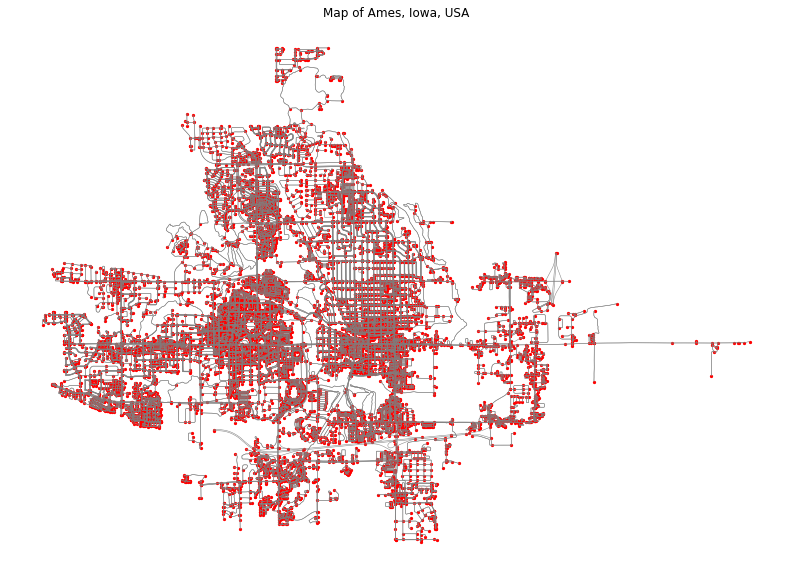

In [11]:
import osmnx as ox
import geopandas as gpd
import matplotlib.pyplot as plt

# Thiết lập thành phố Ames
place_name = "Ames, Iowa, USA"

# Tải dữ liệu bản đồ từ OpenStreetMap
graph = ox.graph_from_place(place_name, network_type="all")

# Chuyển đổi dữ liệu đồ thị thành GeoDataFrame
gdf_nodes, gdf_edges = ox.graph_to_gdfs(graph)

# Hiển thị dữ liệu bản đồ
fig, ax = plt.subplots(figsize=(15, 10))
gdf_edges.plot(ax=ax, color="grey", linewidth=0.5)
gdf_nodes.plot(ax=ax, color="red", markersize=5)
plt.title(f"Map of {place_name}")
plt.axis("off")
plt.show()
